In [1]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import pandas_profiling

In [2]:
home = Path.cwd()
home

PosixPath('/Users/germanportes/Documents/general_assembly/projects/final_project')

In [3]:
stocks = pd.read_csv("../final_project/sp500_1.csv")
#stocks = pd.read_csv("../final_project/sp500_1.csv").profile_report()
stocks.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker
467913,2017-05-04,51.082863,50.254238,50.508476,50.866291,3022900.0,47.516891,0.016489,0.007084,VFC
104305,2016-08-29,22.709999,22.360001,22.360001,22.670000,2742100.0,20.108564,0.015653,0.013864,CNP
472659,2016-03-04,77.230003,75.510002,76.400002,76.699997,913500.0,76.296791,0.022778,0.003927,VRSK
108884,2018-10-30,45.669998,44.189999,44.369999,45.570000,11310800.0,44.899918,0.033492,0.027045,SCHW
395397,2016-11-18,86.040001,85.239998,85.680000,85.540001,2544000.0,80.096771,0.009385,-0.001634,DGX
281837,2016-06-22,18.920000,18.420000,18.799999,18.510000,13901500.0,16.497961,0.027144,-0.015425,KMI
183891,2019-07-31,188.740005,182.100006,188.520004,184.190002,1925700.0,183.798981,0.036463,-0.022968,EL
393754,2018-04-06,34.509998,33.119999,34.270000,33.720001,1290400.0,33.569302,0.041969,-0.016049,PWR
292411,2019-07-23,40.250000,39.299999,39.759998,40.180000,1243700.0,39.797699,0.024173,0.010563,LEG
344848,2015-11-06,15.600000,14.800000,15.420000,15.140000,1701700.0,14.271683,0.054054,-0.018158,NWS


In [4]:
# simple rolling average
stocks['SMA_5'] = stocks.iloc[:,1].rolling(window=5).mean()

In [5]:
stocks.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
42514,2019-06-19,183.119995,180.639999,181.479996,182.770004,2396500.0,181.484268,0.013729,0.007108,AMGN,179.967999
366460,2017-08-14,109.889999,108.080002,108.370003,109.129997,737700.0,102.620415,0.016747,0.007013,PKG,109.670000
298909,2017-05-03,269.950012,268.200012,268.750000,269.600006,636500.0,253.045288,0.006525,0.003163,LMT,270.847998
185003,2015-12-24,51.919998,51.459999,51.610001,51.740002,672600.0,45.972004,0.008939,0.002519,ES,51.368000
267920,2017-03-31,94.019997,93.070000,93.860001,93.099998,351600.0,90.476357,0.010207,-0.008097,JKHY,94.097998


In [6]:
# any missing data
stocks.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             4
dtype: int64

In [7]:
#size
stocks.shape

(505207, 11)

In [8]:
# Establish our target variables: "runs"
stocks['Close'].describe()

count    505207.000000
mean        106.499921
std         171.910724
min           1.740000
25%          44.410000
50%          72.330002
75%         116.739998
max        3766.270020
Name: Close, dtype: float64

In [9]:
# How many unique companies are there?
stocks['ticker'].nunique()

505

In [10]:
# Which stocks have the highest volume or traded daily?
stocks.sort_values(by = 'Volume', ascending=True).sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
315332,2018-08-14,61.830002,60.720001,61.700001,60.730000,2041300.0,58.228992,0.018281,-0.015721,MXIM,62.774001
46564,2019-07-16,307.760010,303.089996,307.510010,305.410004,994400.0,304.430267,0.015408,-0.006829,ANTM,304.829999
134733,2017-05-30,181.289993,179.490005,180.029999,180.509995,1416500.0,175.219757,0.010028,0.002666,STZ,182.313998
191713,2018-08-13,79.750000,78.430000,79.449997,78.559998,10308500.0,75.112045,0.016830,-0.011202,XOM,80.600000
218065,2018-10-22,44.900002,43.860001,44.529999,44.150002,3436500.0,42.427784,0.023712,-0.008534,GIS,44.596000
301114,2018-02-01,105.080002,103.250000,103.839996,103.860001,4922900.0,100.870720,0.017724,0.000193,LOW,106.639999
82225,2017-01-17,23.959999,23.629999,23.660000,23.900000,8601600.0,23.900000,0.013965,0.010144,BSX,23.768000
102039,2019-09-04,114.379997,112.879997,113.330002,113.820000,829300.0,113.820000,0.013288,0.004324,CE,112.634000
419426,2016-06-20,66.620003,64.739998,64.949997,65.949997,3590100.0,62.638302,0.029039,0.015396,SWKS,65.400002
182781,2019-03-06,282.739990,281.100006,282.070007,281.369995,292900.0,275.958221,0.005834,-0.002482,ESS,282.525995


In [11]:
stocks_volume=stocks.groupby('ticker')['Volume'].sum().sort_values(ascending=False)
stocks_volume.head()

ticker
BAC     7.998436e+10
GE      6.550756e+10
AMD     5.947630e+10
F       3.855452e+10
AAPL    3.329668e+10
Name: Volume, dtype: float64

In [159]:
apple = stocks.loc[stocks['ticker'].isin(['AAPL'])]
apple.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
50977,2017-01-17,120.239998,118.220001,118.339996,120.000000,34439800.0,114.975792,0.017087,0.014027,AAPL,119.694000
51157,2017-10-03,155.089996,153.910004,154.009995,154.479996,16230300.0,149.853638,0.007667,0.003052,AAPL,154.534000
51552,2019-05-01,215.309998,209.229996,209.880005,210.520004,64827300.0,208.918625,0.029059,0.003049,AAPL,207.487997
51438,2018-11-13,197.179993,191.449997,191.630005,192.229996,46882900.0,189.953079,0.029929,0.003131,AAPL,204.643997
51132,2017-08-28,162.000000,159.929993,160.139999,161.470001,25966000.0,156.634308,0.012943,0.008305,AAPL,160.754001


In [160]:
# any missing data
apple.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             0
dtype: int64

In [161]:
# size
apple.shape

(1008, 11)

In [162]:
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
50652,2015-10-01,109.620003,107.309998,109.070000,109.580002,63929100.0,102.269157,0.021526,0.004676,AAPL,63.708000
50653,2015-10-02,111.010002,107.550003,108.010002,110.379997,58019800.0,103.015785,0.032171,0.021942,AAPL,75.456001
50654,2015-10-05,111.370003,109.070000,109.879997,110.779999,52064700.0,103.389107,0.021087,0.008191,AAPL,87.276001
50655,2015-10-06,111.739998,109.769997,110.629997,111.309998,48196800.0,103.883736,0.017947,0.006147,AAPL,99.154001
50656,2015-10-07,111.769997,109.410004,111.739998,110.779999,46765600.0,103.389107,0.021570,-0.008591,AAPL,111.102000


In [163]:
# establish target variable: High
apple['Close'].describe()

count    1008.000000
mean      154.138006
std        39.184023
min        90.339996
25%       114.032497
50%       156.345001
75%       186.067501
max       232.070007
Name: Close, dtype: float64

In [164]:
apple_stock = apple[['Low', 'High','Open','SMA_5', 'Volume', 'daily_pct_chng',]]

In [165]:
apple_stock.sample(5)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
51119,159.110001,161.270004,159.259995,159.326001,26131500.0,0.011302
51058,154.669998,156.419998,154.699997,154.602002,32527000.0,0.009050
51202,166.460007,170.199997,167.500000,171.629999,28560000.0,0.009015
51372,206.669998,209.100006,207.360001,209.088000,24611200.0,0.000820
51375,208.330002,210.740005,209.220001,210.226001,28807600.0,0.004875


In [19]:
#apple_stock['ticker'] = apple['ticker']

In [166]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
50652,107.309998,109.620003,109.070000,63.708000,63929100.0,0.004676
50653,107.550003,111.010002,108.010002,75.456001,58019800.0,0.021942
50654,109.070000,111.370003,109.879997,87.276001,52064700.0,0.008191
50655,109.769997,111.739998,110.629997,99.154001,48196800.0,0.006147
50656,109.410004,111.769997,111.739998,111.102000,46765600.0,-0.008591


In [21]:
#apple.to_csv('BAC.csv')

In [167]:
# standardize variables
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()

In [168]:
#std_scaler.fit(stock_high)
std_scaler.fit(apple_stock)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [169]:
scaled_stock =std_scaler.transform(apple_stock)

In [170]:
import pickle
filename = open('AAPL_fitted_scaler.pkl', 'wb')
pickle.dump(scaled_stock, filename)
filename.close()

In [171]:
#scaled_df=pd.DataFrame(scaled_stock, columns = stock_high.columns)
scaled_df=pd.DataFrame(scaled_stock, columns = apple_stock.columns)
scaled_df.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
0,-1.172149,-1.156956,-1.148403,-2.304804,2.074135,0.357431
1,-1.165960,-1.121846,-1.175459,-2.008471,1.677436,1.875235
2,-1.126763,-1.112753,-1.127729,-1.710323,1.277662,0.666403
3,-1.108711,-1.103407,-1.108585,-1.410711,1.018005,0.486713
4,-1.117995,-1.102650,-1.080253,-1.109334,0.921926,-0.808826


In [172]:
scaled_df.mean() 

Low               3.678715e-17
High             -3.057519e-16
Open              8.787063e-16
SMA_5            -3.097170e-16
Volume            3.735163e-17
daily_pct_chng    1.365751e-17
dtype: float64

In [173]:
scaled_df.std()

Low               1.000496
High              1.000496
Open              1.000496
SMA_5             1.000496
Volume            1.000496
daily_pct_chng    1.000496
dtype: float64

In [174]:
# target variable
#y = top_5['Close']
y = apple['Close']
y.shape
y.head

<bound method NDFrame.head of 50652    109.580002
50653    110.379997
50654    110.779999
50655    111.309998
50656    110.779999
            ...    
51655    219.889999
51656    218.820007
51657    223.970001
51658    224.589996
51659    218.960007
Name: Close, Length: 1008, dtype: float64>

In [175]:
X= apple.drop('Close', axis=1)
X = scaled_df.copy()
X.shape
X.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
143,-1.472060,-1.432531,-1.482010,-1.272987,5.475880,1.612923
550,0.353194,0.373230,0.343001,0.417430,-0.300239,0.738848
245,-1.039858,-1.046575,-1.026396,-1.005209,0.199432,-0.285234
21,-0.859086,-0.863953,-0.844150,-0.905674,1.096448,-1.136156
628,0.301877,0.341404,0.321049,0.421516,0.305742,-0.032507
43,-0.945991,-0.942508,-0.937315,-0.915310,0.023777,-0.847697
215,-1.154098,-1.174132,-1.169844,-1.203722,-0.450936,0.417469
214,-1.176017,-1.188530,-1.187967,-1.218201,-0.335336,0.641332
126,-1.095818,-1.092041,-1.113945,-1.135617,0.290261,0.503666
208,-1.265758,-1.285019,-1.272964,-1.338116,-0.355710,-0.036733


In [176]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15, random_state=42)

In [177]:
# instantiate
mystocks= LinearRegression()
#linreg=LinearRegression()
mystocks.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
# fit model  to training dataset
mystocks.fit(X_train, y_train)  # normalize = False, data is expected to be already centered
y_pred = mystocks.predict(X_test)

In [179]:
# predict the y_values on testing dataset
y_pred = mystocks.predict(X_test)
y_pred

array([196.17553031, 171.25831361, 188.63185369, 159.82747806,
       140.53417577, 187.03792595, 189.78042755, 174.10508762,
       119.13848188,  99.46783594, 177.17883818, 140.90330253,
       174.13867011, 152.95195362, 111.99541005, 175.09786287,
       191.41443998, 204.9244974 , 110.09806276,  96.80357501,
       214.2582827 , 178.69015015, 107.92082454, 102.67131691,
       155.30532559, 106.22469634, 143.64058486, 109.84962862,
       141.29127609, 200.06669605, 206.86882237, 155.9027965 ,
        96.12301818, 113.70700408, 228.25955786,  95.75301975,
       200.922308  , 106.67848793, 116.04490098,  94.79679136,
       158.76220798, 166.81336374, 122.21415104, 205.37853521,
       116.8540385 , 110.19180158, 143.6336224 , 173.27865048,
       206.42937626, 188.69830937, 171.60841715, 199.43318684,
       107.63745654, 168.66006063, 176.43255295, 218.95848554,
       144.19325727, 107.97983293, 123.09355759, 115.65171949,
       206.84481343, 144.19501004, 112.10183623, 202.27

In [180]:
#looking at prediction and comparing to true values
[round(x,2)for x in y_pred[:5]]

[196.18, 171.26, 188.63, 159.83, 140.53]

In [181]:
list(y_test[:5])

[195.57000732421875,
 171.61000061035156,
 188.7400054931641,
 159.8800048828125,
 140.46000671386722]

In [182]:
# root mean Sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print ('on average my model errs by', rmse)

on average my model errs by 0.3893858776771709


In [183]:
avg_val= y_train.mean()
avg_val

154.28723125814278

In [184]:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip = sqrt(metrics.mean_squared_error(y_test, comparison_array))
print ('Close', round(rmse-coin_flip))

Close -39


In [185]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.9999016418993003

In [186]:
comparison = np.full(len(y_test), avg_val)
comparison

array([154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28723126,
       154.28723126, 154.28723126, 154.28723126, 154.28

In [187]:
sqrt(metrics.mean_squared_error(y_test, comparison))

39.27471443084007

In [188]:
y_pred

array([196.17553031, 171.25831361, 188.63185369, 159.82747806,
       140.53417577, 187.03792595, 189.78042755, 174.10508762,
       119.13848188,  99.46783594, 177.17883818, 140.90330253,
       174.13867011, 152.95195362, 111.99541005, 175.09786287,
       191.41443998, 204.9244974 , 110.09806276,  96.80357501,
       214.2582827 , 178.69015015, 107.92082454, 102.67131691,
       155.30532559, 106.22469634, 143.64058486, 109.84962862,
       141.29127609, 200.06669605, 206.86882237, 155.9027965 ,
        96.12301818, 113.70700408, 228.25955786,  95.75301975,
       200.922308  , 106.67848793, 116.04490098,  94.79679136,
       158.76220798, 166.81336374, 122.21415104, 205.37853521,
       116.8540385 , 110.19180158, 143.6336224 , 173.27865048,
       206.42937626, 188.69830937, 171.60841715, 199.43318684,
       107.63745654, 168.66006063, 176.43255295, 218.95848554,
       144.19325727, 107.97983293, 123.09355759, 115.65171949,
       206.84481343, 144.19501004, 112.10183623, 202.27

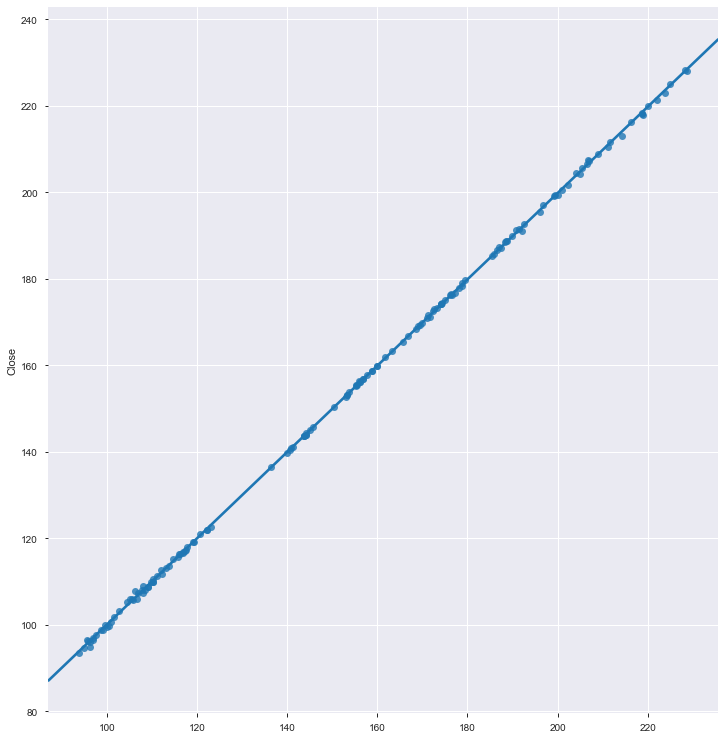

In [189]:
plt.figure(figsize = (12,13))
sns.regplot(x=y_pred, y=y_test);

In [190]:
apple_stock['ticker'] = apple['ticker']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [191]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
50652,107.309998,109.620003,109.070000,63.708000,63929100.0,0.004676,AAPL
50653,107.550003,111.010002,108.010002,75.456001,58019800.0,0.021942,AAPL
50654,109.070000,111.370003,109.879997,87.276001,52064700.0,0.008191,AAPL
50655,109.769997,111.739998,110.629997,99.154001,48196800.0,0.006147,AAPL
50656,109.410004,111.769997,111.739998,111.102000,46765600.0,-0.008591,AAPL


In [192]:
# pickle final model
filename = open('AAPL_final_model.pkl', 'wb')
pickle.dump(apple_stock, filename)
filename.close()

In [193]:
X_test.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
618,0.640985,0.598540,0.627600,0.657664,0.427780,-0.363591
215,-1.154098,-1.174132,-1.169844,-1.203722,-0.450936,0.417469
365,-0.354163,-0.370645,-0.373986,-0.390599,-0.492785,0.608474
44,-0.993956,-0.975850,-0.957479,-0.927619,0.573105,-1.071811
531,0.556144,0.525795,0.525757,0.473377,-0.578868,0.741596
377,-0.251528,-0.281734,-0.263975,-0.286978,-0.897594,-0.090301
935,1.167312,1.141355,1.181995,1.079209,-0.773247,-0.452827
746,1.659600,1.677855,1.626634,1.763588,-0.098060,0.128030
321,-0.888742,-0.910429,-0.900815,-0.933623,-0.575337,0.198042
380,-0.230898,-0.251676,-0.251213,-0.263167,-0.356771,-0.175506


In [194]:
y_test.head(10)

51590    195.570007
51282    171.610001
51334    188.740005
51166    159.880005
51017    140.460007
51307    187.360001
51308    190.039993
51181    174.250000
50973    119.110001
50722     99.959999
Name: Close, dtype: float64

In [195]:
stock_filter = apple.loc[apple['ticker']=='AAPL']
#stock_filter = top_5.loc[top_5['ticker']]
print(len(stock_filter))
print (stock_filter.head())

1008
             Date        High         Low        Open       Close      Volume  \
50652  2015-10-01  109.620003  107.309998  109.070000  109.580002  63929100.0   
50653  2015-10-02  111.010002  107.550003  108.010002  110.379997  58019800.0   
50654  2015-10-05  111.370003  109.070000  109.879997  110.779999  52064700.0   
50655  2015-10-06  111.739998  109.769997  110.629997  111.309998  48196800.0   
50656  2015-10-07  111.769997  109.410004  111.739998  110.779999  46765600.0   

        Adj Close  HL_pct_diff  daily_pct_chng ticker       SMA_5  
50652  102.269157     0.021526        0.004676   AAPL   63.708000  
50653  103.015785     0.032171        0.021942   AAPL   75.456001  
50654  103.389107     0.021087        0.008191   AAPL   87.276001  
50655  103.883736     0.017947        0.006147   AAPL   99.154001  
50656  103.389107     0.021570       -0.008591   AAPL  111.102000  


In [196]:
stock_filter['Close'].mean()

154.13800599839954

In [197]:
print ('actual high', y_test[51590])
print ('predicted', round(y_pred[0]))
## talk to austin about this

actual high 195.57000732421875
predicted 196.0


In [198]:
# predict the y-values
y_pred = mystocks.predict(X_test)
for i in y_pred[:5]:
    print(round(i,0))

196.0
171.0
189.0
160.0
141.0


In [199]:
# How similar are those to the actual high prices?
for i in y_test[:5]:
    print(round(i,0))

196.0
172.0
189.0
160.0
140.0


In [200]:
# the residuals are the difference between true y values and predicted y values.
residuals= y_test - y_pred
for i in residuals[:5]:
    print(round(i,0))

-1.0
0.0
0.0
0.0
-0.0


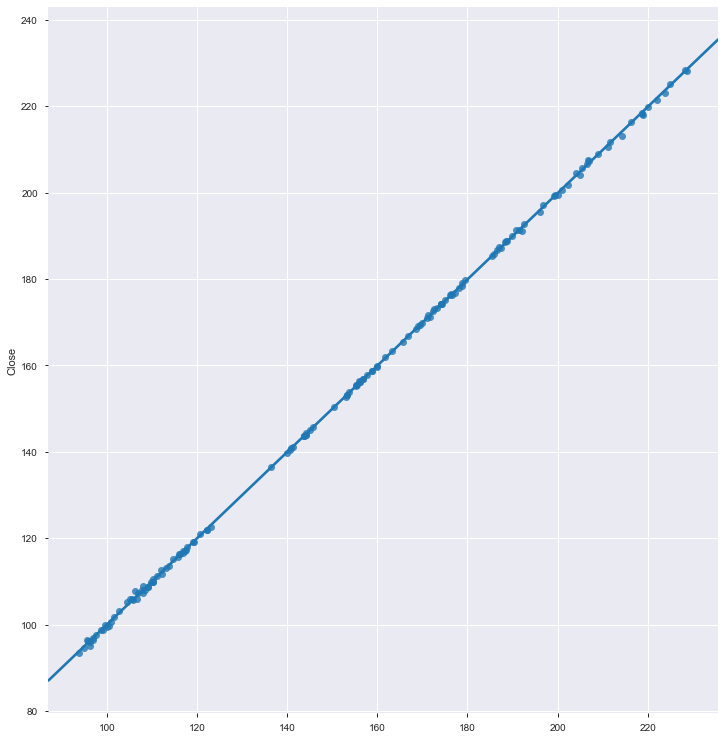

In [201]:
# Use a scatter plot to compare our predictions to the actual values
# Remember: when x==y, that indicates an accurate model! 
# Do we have that?
plt.figure(figsize=(12, 13))
sns.regplot(y_pred, y_test);

In [202]:
apple_stock['ticker'] = apple['ticker']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [203]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
50652,107.309998,109.620003,109.070000,63.708000,63929100.0,0.004676,AAPL
50653,107.550003,111.010002,108.010002,75.456001,58019800.0,0.021942,AAPL
50654,109.070000,111.370003,109.879997,87.276001,52064700.0,0.008191,AAPL
50655,109.769997,111.739998,110.629997,99.154001,48196800.0,0.006147,AAPL
50656,109.410004,111.769997,111.739998,111.102000,46765600.0,-0.008591,AAPL


In [204]:
apple.to_csv('AAPL.csv')

In [205]:
file = open('/Users/germanportes/Documents/general_assembly/projects/final_project/AAPL_final_model.pkl', 'rb')
BAC=pickle.load(file)
file.close()
BAC

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
50652,107.309998,109.620003,109.070000,63.708000,63929100.0,0.004676,AAPL
50653,107.550003,111.010002,108.010002,75.456001,58019800.0,0.021942,AAPL
50654,109.070000,111.370003,109.879997,87.276001,52064700.0,0.008191,AAPL
50655,109.769997,111.739998,110.629997,99.154001,48196800.0,0.006147,AAPL
50656,109.410004,111.769997,111.739998,111.102000,46765600.0,-0.008591,AAPL
...,...,...,...,...,...,...,...
51655,218.830002,220.940002,220.000000,221.466000,18833500.0,-0.000500,AAPL
51656,217.279999,220.960007,220.539993,221.146002,25352000.0,-0.007799,AAPL
51657,220.789993,224.580002,220.899994,222.094003,25977400.0,0.013898,AAPL
51658,224.199997,228.220001,225.070007,223.240002,34805800.0,-0.002133,AAPL
